In [1]:
#Loading the image data as arrays:

import numpy as np 
import pandas as pd
import imageio
import matplotlib.pyplot as plt
from os import listdir
import cv2

In [2]:
img_shape = 100

images = []
labels =[]        #1 for malignant, 0 for benign


In [3]:
directory_benign = "benign/"
directory_malignant = "malignant/"

In [4]:
def assign_label(img, label):
    return label

In [5]:
import os

In [6]:
def prepare_data(label,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,label)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_shape,img_shape))
        
        images.append(np.array(img))
        labels.append(str(label))

In [7]:
prepare_data('benign', directory_benign)

In [8]:
prepare_data('malignant', directory_malignant)

In [9]:
X = np.array(images)

In [10]:
y = np.array(labels)

In [11]:
X.shape

(3297, 100, 100, 3)

In [12]:
y.shape

(3297,)

In [13]:
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
y=le.fit_transform(y)

In [16]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [17]:
y.shape

(3297,)

In [18]:
y=to_categorical(y,2)

In [19]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [20]:
y.shape

(3297, 2)

In [21]:
# Now we have finally read the data in terms of arrays. Let us now view some images and see how they look like:


In [22]:
def show_class(num):
    #Print the category of cloth:
    print("type of Tumour is: ") 
    if np.argmax(y[num])==0:
        print("Benign")
    else:
        print("Malignant")
    plt.imshow(X[num],cmap="gray")
    plt.show()

type of Tumour is: 
Benign


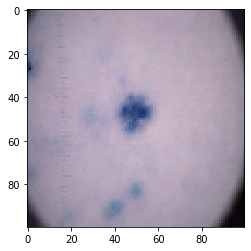

type of Tumour is: 
Benign


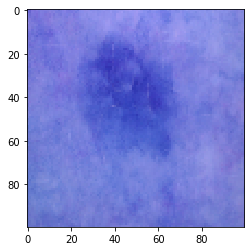

type of Tumour is: 
Malignant


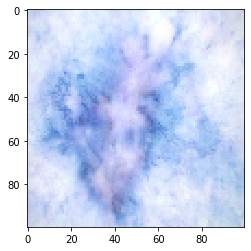

type of Tumour is: 
Malignant


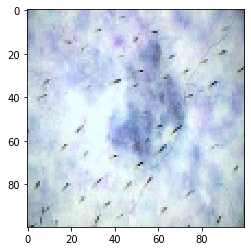

type of Tumour is: 
Benign


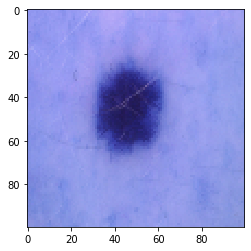

type of Tumour is: 
Benign


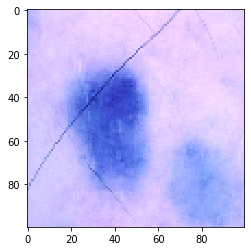

type of Tumour is: 
Benign


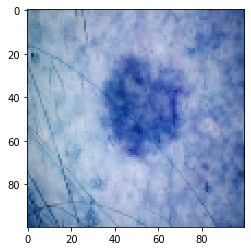

type of Tumour is: 
Malignant


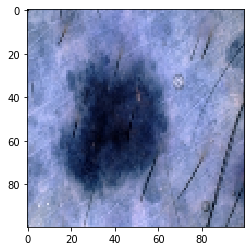

type of Tumour is: 
Malignant


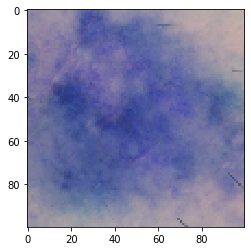

type of Tumour is: 
Benign


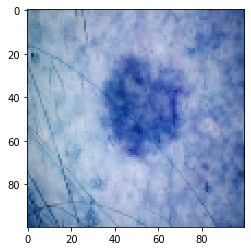

In [23]:
import random as rn
for i in range(10):
    l=rn.randint(0,3297)
    show_class(l)

In [24]:
# Train Test Split:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1./255,
                                    rotation_range=90,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    zoom_range=(0.9,1),
                                    fill_mode= 'nearest',
                                    brightness_range=(0.8, 1.2),
                                  )

train_generator = train_datagen.flow(X_train, y_train, batch_size = 150)
val_generator = train_datagen.flow(X_test, y_test, batch_size = 150, shuffle = True)

In [26]:
from keras import backend as K
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,BatchNormalization
from keras.models import Sequential
from keras.layers import Flatten

#defining the model
model = Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape = X_train[1].shape, padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
________________________________________________

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=25,
                    verbose=2,
                    validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2472 samples, validate on 825 samples
Epoch 1/25
 - 43s - loss: 0.5422 - accuracy: 0.7431 - val_loss: 0.6172 - val_accuracy: 0.6539
Epoch 2/25
 - 40s - loss: 0.4559 - accuracy: 0.7822 - val_loss: 0.5498 - val_accuracy: 0.7400
Epoch 3/25
 - 40s - loss: 0.4276 - accuracy: 0.7996 - val_loss: 0.4221 - val_accuracy: 0.7806
Epoch 4/25
 - 40s - loss: 0.3946 - accuracy: 0.8103 - val_loss: 0.4542 - val_accuracy: 0.7994
Epoch 5/25
 - 41s - loss: 0.3938 - accuracy: 0.8129 - val_loss: 0.3998 - val_accuracy: 0.8097
Epoch 6/25
 - 40s - loss: 0.3746 - accuracy: 0.8254 - val_loss: 0.4022 - val_accuracy: 0.8170
Epoch 7/25
 - 40s - loss: 0.3593 - accuracy: 0.8305 - val_loss: 0.8744 - val_accuracy: 0.5430
Epoch 8/25
 - 40s - loss: 0.3561 - accuracy: 0.8309 - val_loss: 0.5288 - val_accuracy: 0.7752
Epoch 9/25
 - 40s - loss: 0.3300 - accuracy: 0.8384 - val_loss: 0.4498 - val_accuracy: 0.7855
Epoch 10/25
 - 41s - loss: 0.3319 - accuracy: 0.8424 - val_

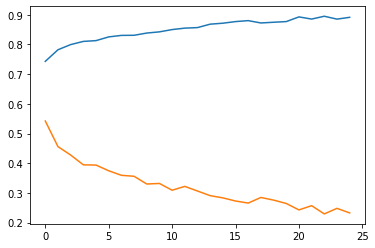

In [29]:
df_result = pd.DataFrame.from_dict(history.history)
df_result['accuracy'].plot()

df_result['loss'].plot()